In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("StudentsPerformance_cleaned.csv")
#print(df.columns.tolist())

df['Average_marks'] = df[['Math_score', 'Reading_score', 'Writing_score']].mean(axis=1).round(2)

label_encoder = LabelEncoder()
df['Parents_education'] = label_encoder.fit_transform(df['Parents_education'])

# View the encoding map
encoding_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoding map for Parents_education:", encoding_map)

df.to_csv("StudentsPerformance_for_EDA.csv", index=False)



Encoding map for Parents_education: {"Associate's degree": np.int64(0), "Bachelor's degree": np.int64(1), 'College': np.int64(2), 'High school': np.int64(3), "Master's degree": np.int64(4)}


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Load dataset


In [24]:
df = pd.read_csv("StudentsPerformance_for_EDA.csv")
sns.set(style="whitegrid")

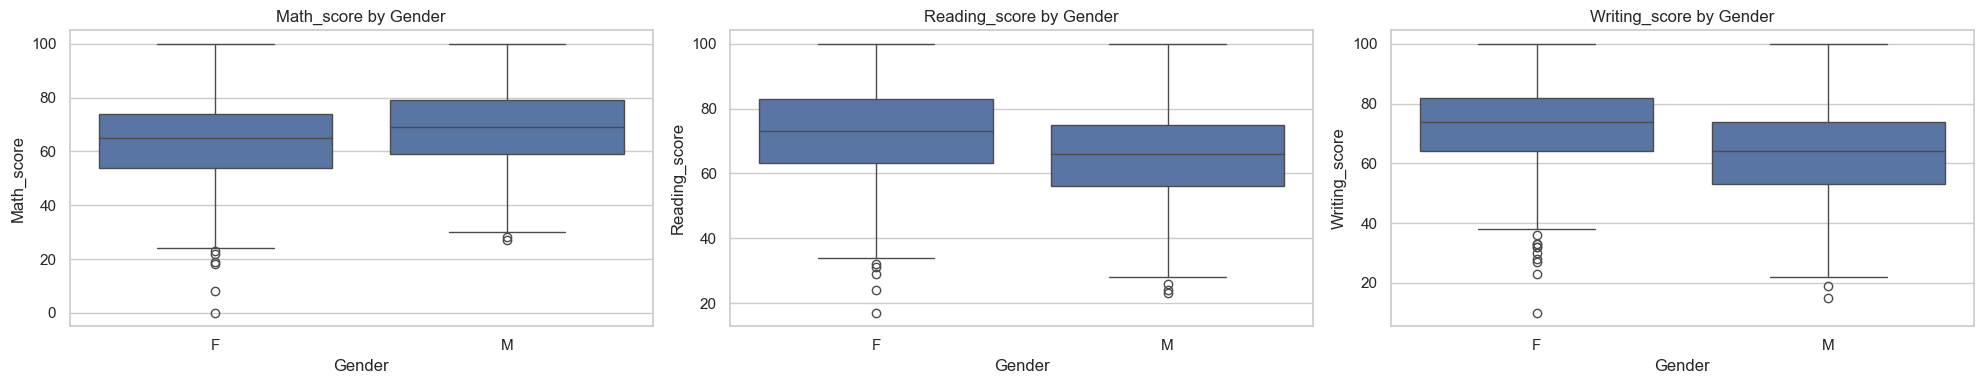

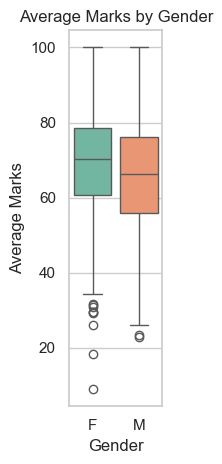

In [25]:
# 1. Are there significant score differences between genders across subjects?
plt.figure(figsize=(20, 4))
for i, subject in enumerate(['Math_score', 'Reading_score', 'Writing_score']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Gender', y=subject, data=df)
    plt.title(f'{subject} by Gender')
plt.tight_layout()
plt.show()

# Average marks boxplot
plt.subplot(1, 4, 4)
sns.boxplot(x='Gender', y='Average_marks', data=df, palette='Set2')
plt.title('Average Marks by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Marks')

plt.tight_layout()
plt.show()

Encoding map for Parents_education: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4)}


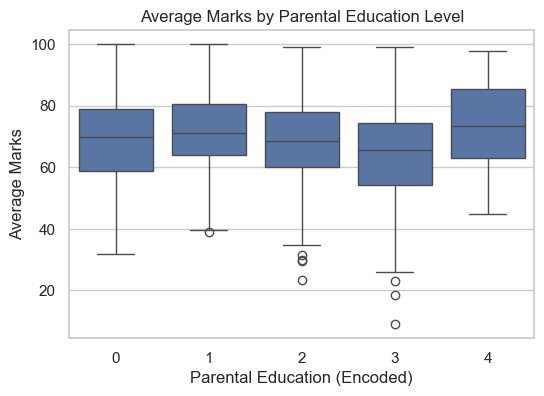

In [37]:
# 2. Does parental education level correlate with student performance?
plt.figure(figsize=(6, 4))
sns.boxplot(x='Parents_education', y='Average_marks', data=df)
plt.title('Average Marks by Parental Education Level')
plt.xlabel('Parental Education (Encoded)')
plt.ylabel('Average Marks')

# View the encoding map
encoding_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoding map for Parents_education:", encoding_map)

plt.show()



Average scores:
Math_score       66.089
Reading_score    69.169
Writing_score    68.054
dtype: float64

Standard deviations (variability):
Math_score       15.163080
Reading_score    14.600192
Writing_score    15.195657
dtype: float64


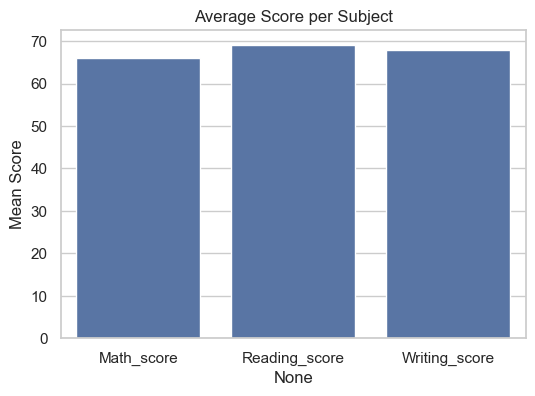

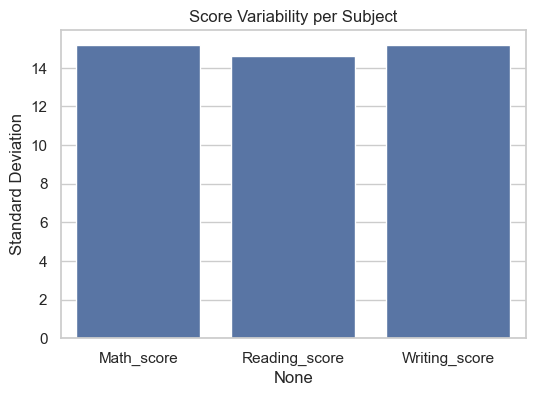

In [28]:
# 3. Which subject has the highest average score overall? Which is the most variable?
subject_means = df[['Math_score', 'Reading_score', 'Writing_score']].mean()
subject_stds = df[['Math_score', 'Reading_score', 'Writing_score']].std()

print("Average scores:")
print(subject_means)

print("\nStandard deviations (variability):")
print(subject_stds)

# Bar plot for mean scores
plt.figure(figsize=(6, 4))
sns.barplot(x=subject_means.index, y=subject_means.values)
plt.title('Average Score per Subject')
plt.ylabel('Mean Score')
plt.show()

# Bar plot for variability
plt.figure(figsize=(6, 4))
sns.barplot(x=subject_stds.index, y=subject_stds.values)
plt.title('Score Variability per Subject')
plt.ylabel('Standard Deviation')
plt.show()

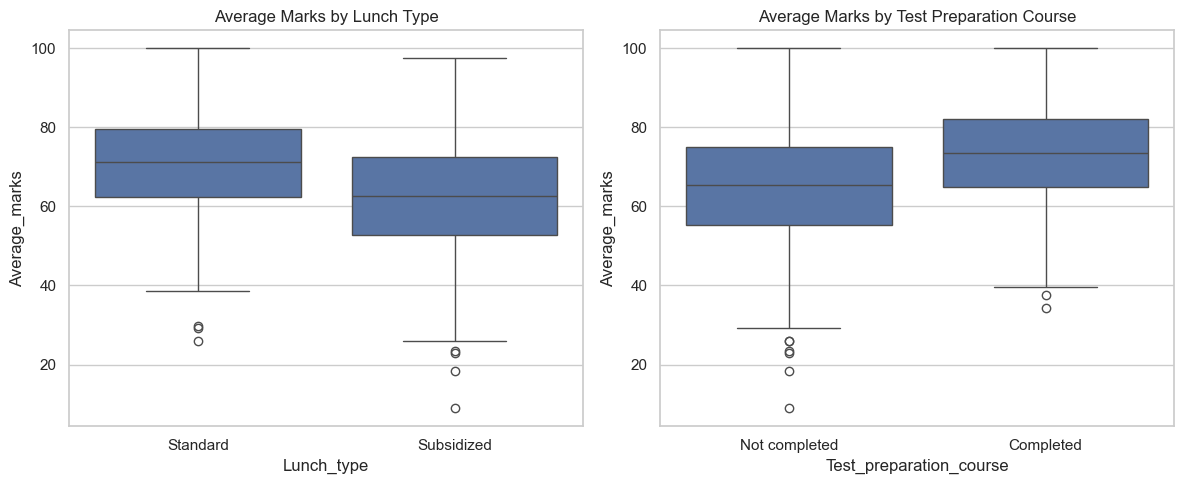

In [29]:
# 4. How does lunch type or test preparation affect student performance?
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Lunch_type', y='Average_marks', data=df)
plt.title('Average Marks by Lunch Type')

plt.subplot(1, 2, 2)
sns.boxplot(x='Test_preparation_course', y='Average_marks', data=df)
plt.title('Average Marks by Test Preparation Course')

plt.tight_layout()
plt.show()

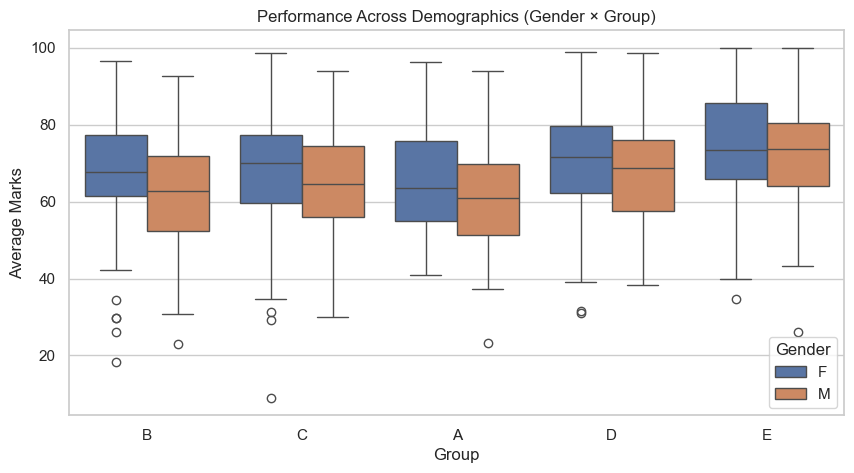

In [30]:
# 5. Is there evidence of bias or disparity in performance across demographic groups?
plt.figure(figsize=(10, 5))
sns.boxplot(x='Group', y='Average_marks', hue='Gender', data=df)
plt.title('Performance Across Demographics (Gender × Group)')
plt.ylabel('Average Marks')
plt.show()

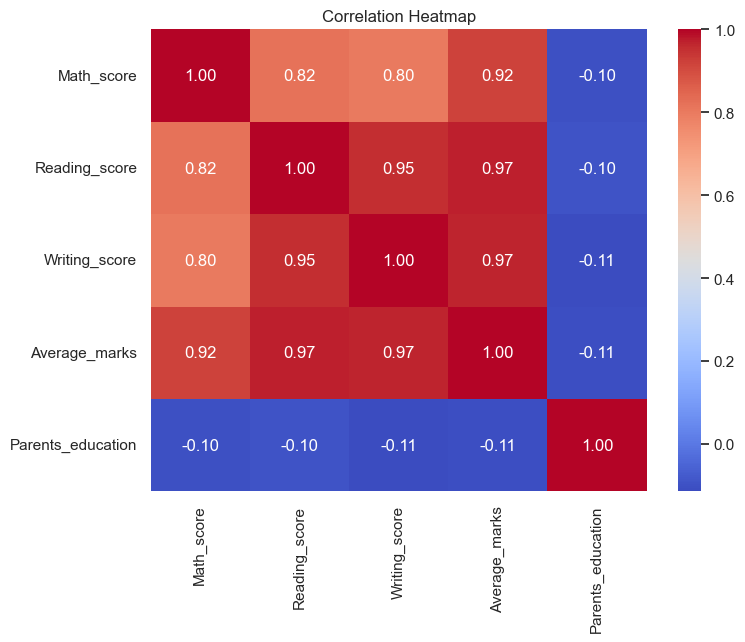

In [31]:
# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Math_score', 'Reading_score', 'Writing_score', 'Average_marks', 'Parents_education']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

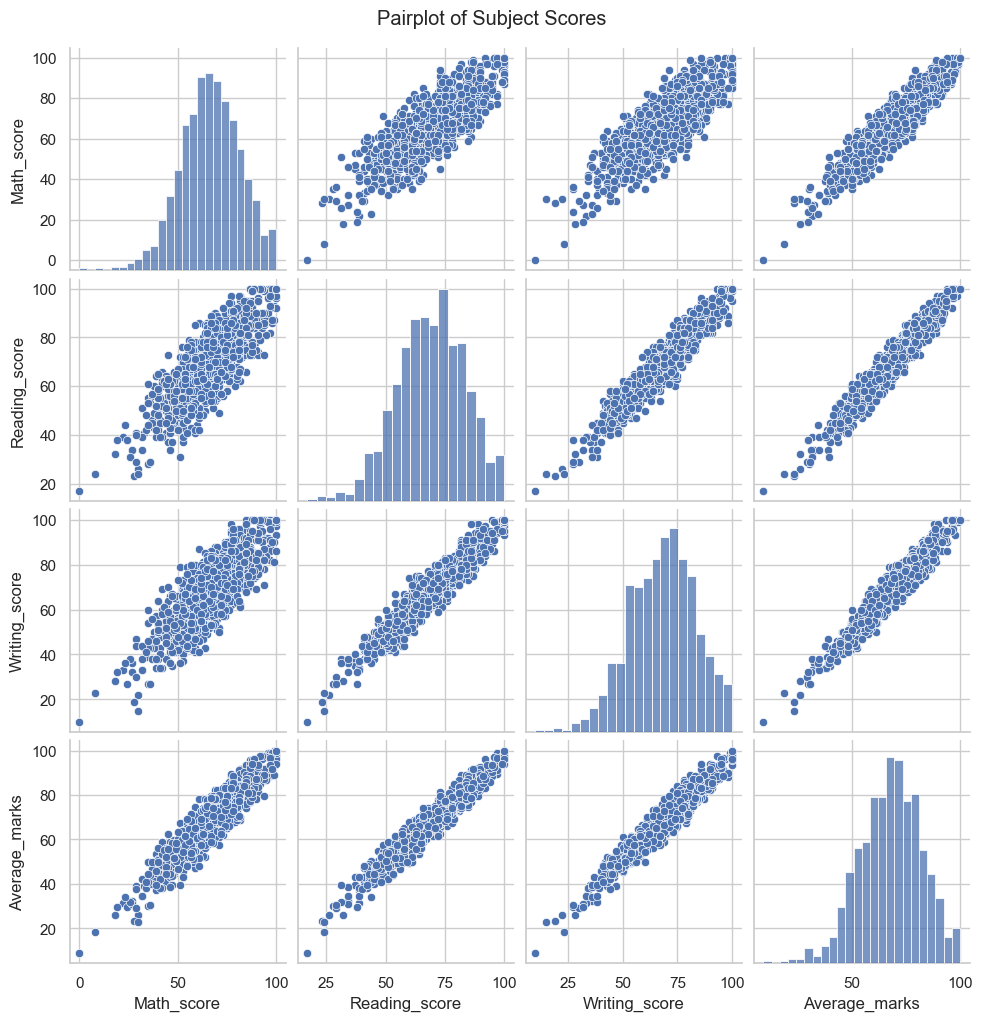

In [32]:
# 7. Pairplot of Scores
sns.pairplot(df[['Math_score', 'Reading_score', 'Writing_score', 'Average_marks']])
plt.suptitle('Pairplot of Subject Scores', y=1.02)
plt.show()

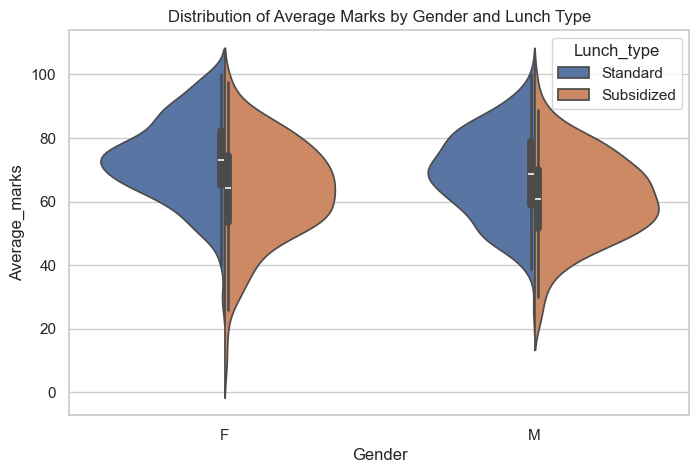

In [33]:
# 8. Violin Plot: Average Marks by Gender × Lunch Type
plt.figure(figsize=(8, 5))
sns.violinplot(x='Gender', y='Average_marks', hue='Lunch_type', data=df, split=True)
plt.title('Distribution of Average Marks by Gender and Lunch Type')
plt.show()

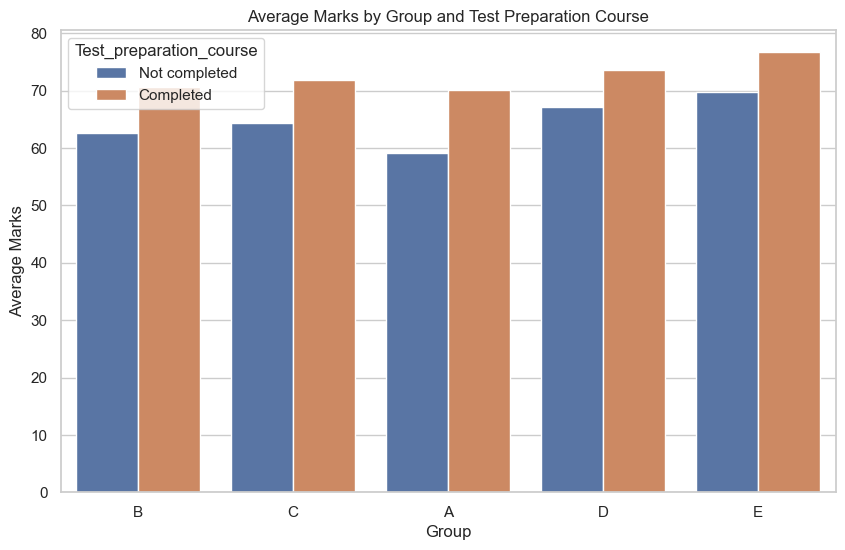

In [34]:
# 9. Bar Plot: Average Marks by Group and Test Preparation
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Average_marks', hue='Test_preparation_course', data=df, ci=None)
plt.title('Average Marks by Group and Test Preparation Course')
plt.ylabel('Average Marks')
plt.show()

# 10. Stacked Bar Chart: Performance Bands by Gender

# Create performance bands (Low <60, Medium 60–80, High >80)
df['Performance_band'] = pd.cut(df['Average_marks'], bins=[0, 60, 80, 100],
                                labels=['Low', 'Medium', 'High'])

# Group data for stacking
band_data = df.groupby(['Gender', 'Performance_band']).size().unstack().fillna(0)
band_percent = band_data.div(band_data.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
band_percent.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title('Performance Bands by Gender (Stacked %)')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Performance Band')
plt.tight_layout()
plt.show()

# INSIGHTS- 

Here are the insights we have generated by looking at the bar plots, boxplots, and statistical summaries

(including average scores and standard deviations) across different subjects and student groups.
    
These visual and numeric analyses helped us identify patterns in performance, 
    
variability, and potential areas for targeted intervention.

## Are there significant score differences between genders across subjects?

1. Gender-Based Performance Trends 
Our analysis revealed notable and consistent differences in performance between male and female students across all subjects:

Female students consistently outperform male students in reading and writing, with the largest performance gap observed in writing

scores. This suggests stronger language and communication skills among female students.

In contrast, male students perform slightly better in math, though the difference is relatively small.

Despite the minor lag in math, females have a higher overall average score, indicating stronger general academic performance.

Additionally, we observed that low-performing outliers are more frequent among males, which may indicate a need for greater academic support in this group.

These trends point toward the importance of differentiated instruction—particularly in mathematics support for females and language reinforcement for males.

## Does parental education level correlate with student performance?

2. Based on the boxplot using alphabetical encoding, students whose parents have a Master’s degree (4) perform the best on average, showing the highest academic performance across subjects.

Interestingly, students whose parents have a Bachelor’s degree (1) also perform quite well — better than those with Associate’s degree (0) or College (2) education.

Both College (2) and Associate’s degree (0) appear to yield similar student performance, showing a moderate level.

The lowest performing group is students whose parents have only a High school (3) education — showing the clear impact of parental educational attainment.

Overall, the trend from the plot suggests a general increase in student performance with increasing parental education, even though the alphabetical encoding isn’t in educational order. However, this still reflects a visible gap between students from low and high education households.



## Which subject has the highest average score overall? Which is the most variable?

3. Subject-Level Averages and Variability
Analyzing the raw score data across all students, we find:

Reading has the highest average score (~69.17), followed by writing (~68.05), and finally math (~66.09).

Reading not only has the highest average but also exhibits lower variance, suggesting stronger overall student proficiency and consistency in this subject.

Math, on the other hand, shows higher variability, indicating a wider performance gap and greater struggle among certain students.

This suggests that math instruction may benefit most from targeted intervention, especially for students at the lower end of the performance curve.
    
 Math emerges as the weakest subject with the lowest average score (66.09) and high variability (standard deviation: 15.16), 

indicating both overall underperformance and inconsistency among students.
    
In contrast, reading shows the highest average (69.17) and the most consistent performance (lowest variability: 14.60), 
while writing, despite a decent average (68.05), '

displays the greatest variability (15.20), suggesting a wide gap between high and low performers.
    
 These patterns highlight the need for targeted interventions in math to raise overall achievement,'

and in writing to support struggling students and reduce performance disparity, 

while reading requires less immediate intervention but may benefit from enrichment strategies.




## How does lunch type affect student performance?

Lunch type serves as a proxy for socioeconomic status. The data reveals a clear pattern:

Students receiving standard (non-subsidized) lunch perform significantly better in all subjects.

Those on free/reduced lunch programs (typically from lower-income households) have notably lower scores, often across the board.

This disparity highlights the broader influence of socioeconomic factors on academic outcomes and 

reinforces the importance of equity-focused programs, such as free tutoring, meal support, and after-school learning labs

## How does test preparation affect student performance?

5. Effect of Test Preparation Courses

The data shows a strong relationship between completion of test preparation courses and academic performance:

Students who completed the prep course consistently outperformed those who did not, across all subjects.

The performance difference is most pronounced in writing, suggesting that structured preparation significantly enhances expressive and analytical skills.

This underlines the value of institution-sponsored test prep programs, particularly for underserved groups who may not have access to external coaching.



## Is there evidence of bias or disparity in performance across demographic groups?

6. Disparities and Educational Equity

Combining all variables—gender, socioeconomic status, parental education, and prep course participation—there’s strong evidence of

demographic disparities:

Female students from higher-educated, higher-income families who completed test prep tend to be the top performers.

Male students from lower-income backgrounds with low parental education and no prep course are overrepresented in the

lowest-performing segments.

These patterns signal a need for a multi-tiered intervention strategy: academic support tailored by subject,

socio-emotional support for at-risk groups, and parental engagement to address disparities at their root.

